In [1]:
from astropy.io import fits
import astropy.units as u
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import numpy as np
import proper

import misc

spcdir_old = Path('/groups/douglase/phaseb_data/spc_20190130'); print(spcdir_old)
spcdir = Path('/groups/douglase/webbpsf-data/CGI/optics/F730'); print(spcdir)

lambda_m = 730e-9*u.m
D = 2.3633372*u.m

lamD = lambda_m/D
as_per_lamD = lamD * 180/np.pi * 3600

/groups/douglase/phaseb_data/spc_20190130
/groups/douglase/webbpsf-data/CGI/optics/F730


# Add pupil scales to the pupil files.

/groups/douglase/webbpsf-data/CGI/optics/F730/pupil_SPC-20190130.fits
0.0023633372 m / pix (1002, 1002)
/groups/douglase/webbpsf-data/CGI/optics/F730/pupil_SPC-20190130_rotated.fits
0.0023633372 m / pix (1002, 1002)


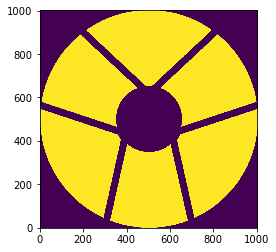

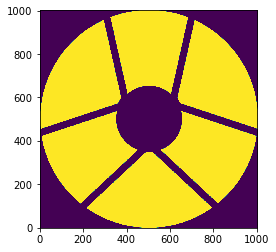

In [4]:
pupil_fnames = ['pupil_SPC-20190130.fits', 'pupil_SPC-20190130_rotated.fits']
pupil_diam = 2.3633372*u.m
pupil_diam_pix = 1000*u.pixel

for fname in pupil_fnames:
    spc730pup = fits.open(spcdir_old/fname)
    spc730pup_data = spc730pup[0].data
    spc730pup.close()
    
    hdr = fits.Header()
    hdr['PUPLDIAM'] = pupil_diam.value
    hdr['PUPLSCAL'] = pupil_diam.value/pupil_diam_pix.value
    hdr['PIXELSCL'] = pupil_diam.value/pupil_diam_pix.value
    spc730pup_new = fits.PrimaryHDU(data=spc730pup_data, header=hdr)
    spc730pup_new.writeto(spcdir/fname, overwrite=True)
    print(spcdir/fname)
    print(pupil_diam/pupil_diam_pix, spc730pup_data.shape)
    plt.figure()
    plt.imshow(spc730pup_data)

# Add pupil scales to the apodizer files.

/groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130.fits
1.7e-05 (1002, 1002)
/groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
1.7e-05 (1002, 1002)


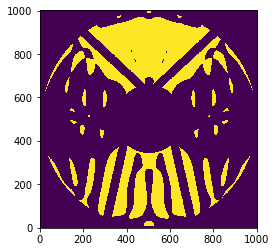

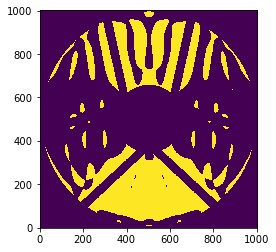

In [7]:
spm_fnames = ['SPM_SPC-20190130.fits', 'SPM_SPC-20190130_rotated.fits']
pxscl = 1.7000e-5

for fname in spm_fnames:
    spc730spm = fits.open(spcdir_old/fname)
    spc730spm_data = spc730spm[0].data
    spc730spm.close()
    
    hdr = fits.Header()
    hdr['PIXSCALE'] = pxscl
    hdr['PUPLSCAL'] = pxscl*spc730spm_data.shape[0]
    hdr['PIXELSCL'] = pxscl
    spc730spm_new = fits.PrimaryHDU(data=spc730spm_data, header=hdr)
    spc730spm_new.writeto(spcdir/fname, overwrite=True)
    print(spcdir/fname)
    print(pxscl, spc730spm_data.shape)
    plt.figure()
    plt.imshow(spc730spm_data)

# Add pixel scales to the FPM files.

/groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
0.0006371215608182376 arcsec (1801, 1801)
/groups/douglase/webbpsf-data/CGI/optics/F730/fpm_0.05lamdivD.fits
0.003185607804091188 arcsec (361, 361)


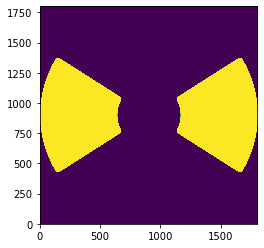

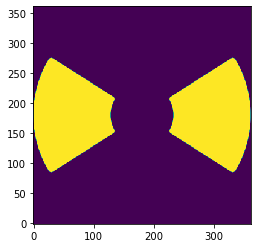

In [9]:
fpm_fnames = ['FPM_res100_SPC-20190130.fits', 'fpm_0.05lamdivD.fits']
fpm_sampling = [(lamD/100*u.radian).to(u.arcsecond), (0.05*lamD*u.radian).to(u.arcsecond)]

for i,fname in enumerate(fpm_fnames):
    spc730fpm = fits.open(spcdir_old/fname)
    spc730fpm_data = spc730fpm[0].data
    spc730fpm.close()
    
    hdr = fits.Header()
    hdr['PIXELSCL'] = fpm_sampling[i].value
    spc730fpm_new = fits.PrimaryHDU(data=spc730fpm_data, header=hdr)
    spc730fpm_new.writeto(spcdir/fname, overwrite=True)
    print(spcdir/fname)
    print(fpm_sampling[i], spc730fpm_data.shape)
    plt.figure()
    plt.imshow(spc730fpm_data)


# Add pupil scales to the lyot stop files.

/groups/douglase/webbpsf-data/CGI/optics/F730/LS_SPC-20190130.fits
(1002, 1002) 1.7e-05 m
/groups/douglase/webbpsf-data/CGI/optics/F730/lyotstop_0.5mag.fits
(501, 501) 3.4e-05 m


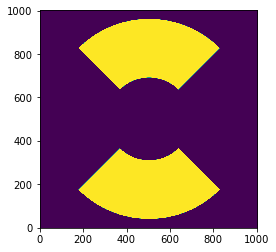

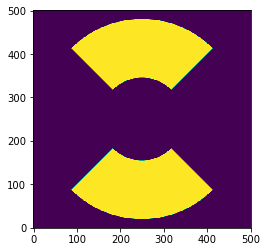

In [13]:
ls_fnames = ['LS_SPC-20190130.fits', 'lyotstop_0.5mag.fits']
ls_sampling = [1.7000e-5*u.m, 1.7000e-5*1002/501*u.m]

for i,fname in enumerate(ls_fnames):
    spc730ls = fits.open(spcdir_old/fname)
    ls_data = spc730ls[0].data
    spc730ls.close()
    
    hdr = fits.Header()
    hdr['PUPLDIAM'] = ls_sampling[i].value*ls_data.shape[0]-2
    hdr['PUPLSCAL'] = ls_sampling[i].value
    hdr['PIXELSCL'] = ls_sampling[i].value
    ls_new = fits.PrimaryHDU(data=ls_data, header=hdr)
    ls_new.writeto(spcdir/fname, overwrite=True)
    print(str(spcdir/fname))
    print(ls_data.shape, ls_sampling[i])
    plt.figure()
    plt.imshow(ls_data)